We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-04-20 17:53:10--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.83, 13.227.223.78, 13.227.223.89, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569108 (556K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 555.77K  --.-KB/s    in 0.1s    

2020-04-20 17:53:10 (4.75 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [569108/569108]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(10)

,dateRep,day,month,year,cases,deaths,geoId,continentExp,countryterritoryCode,popData2018,countriesAndTerritories
0,2020-04-20,20,4,2020,88,3,AF,Asia,AFG,37172386.0,Afghanistan
1,2020-04-19,19,4,2020,63,0,AF,Asia,AFG,37172386.0,Afghanistan
2,2020-04-18,18,4,2020,51,1,AF,Asia,AFG,37172386.0,Afghanistan
3,2020-04-17,17,4,2020,10,4,AF,Asia,AFG,37172386.0,Afghanistan
4,2020-04-16,16,4,2020,70,2,AF,Asia,AFG,37172386.0,Afghanistan
5,2020-04-15,15,4,2020,49,2,AF,Asia,AFG,37172386.0,Afghanistan
6,2020-04-14,14,4,2020,58,3,AF,Asia,AFG,37172386.0,Afghanistan
7,2020-04-13,13,4,2020,52,0,AF,Asia,AFG,37172386.0,Afghanistan
8,2020-04-12,12,4,2020,34,3,AF,Asia,AFG,37172386.0,Afghanistan
9,2020-04-11,11,4,2020,37,0,AF,Asia,AFG,37172386.0,Afghanistan


Use a count on columns to see how many missing values we have. We would like to compare countries by geoId.

In [4]:
df.count()

dateRep                    11981
day                        11981
month                      11981
year                       11981
cases                      11981
deaths                     11981
geoId                      11944
continentExp               11981
countryterritoryCode       11856
popData2018                11890
countriesAndTerritories    11981
dtype: int64

Because we seem to miss some geoID entries, we will drop them. The resulting dataframe will be pivoted so we get one row per date, columns by geoId and the number of new cases and deaths in the cells. Again, show the first 10 rows to check our pivot.

In [5]:
df_geo = df.dropna().pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                           ... deaths          \
geoId         AD   AE   AF  AG  AL   AM  AO  AR   AT   AU  ...     VC  VE  VG   
dateRep                                                    ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-05   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-06   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-07   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-08   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-09   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-05 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-06 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-07 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-08 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-09 NaN  0.0 NaN NaN NaN NaN NaN  

[10 rows x 400 columns]

Looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to see what's there.

In [6]:
df_geo.describe()

cases                                                            \
geoId         AD          AE          AF         AG         AL          AM   
count  38.000000  106.000000  102.000000  32.000000  43.000000  103.000000   
mean   18.763158   63.971698    9.764706   0.718750  13.069767   13.000000   
std    12.279260  138.965666   19.293551   1.486159   7.947432   21.309116   
min     0.000000    0.000000    0.000000   0.000000   0.000000    0.000000   
25%     9.000000    0.000000    0.000000   0.000000   6.500000    0.000000   
50%    18.500000    0.000000    0.000000   0.000000  12.000000    0.000000   
75%    25.750000   14.750000    6.000000   0.250000  18.500000   24.500000   
max    43.000000  481.000000   88.000000   6.000000  29.000000   92.000000   

                                                       ... deaths             \
geoId         AO          AR           AT          AU  ...     VC         VE   
count  30.000000   45.000000   112.000000  112.000000  ...   28.0  37.000000   
mean    0.800000   65.111111   131.339286   59.035714  ...    0.0   0.243243   
std     1.323527   56.509944   230.222280  121.532773  ...    0.0   0.596537   
min     0.000000    0.000000     0.000000    0.000000  ...    0.0   0.000000   
25%     0.000000   11.000000     0.000000    0.000000  ...    0.0   0.000000   
50%     0.000000   67.000000     0.000000    2.000000  ...    0.0   0.000000   
75%     1.000000  101.000000   164.750000   51.250000  ...    0.0   0.000000   
max     5.000000  186.000000  1141.000000  611.000000  ...    0.0   2.000000   

                                                                       \
geoId     VG         VI     VN         XK    YE         ZA         ZM   
count  25.00  27.000000  108.0  36.000000  11.0  44.000000  33.000000   
mean    0.04   0.111111    0.0   0.333333   0.0   1.227273   0.090909   
std     0.20   0.320256    0.0   0.676123   0.0   2.550546   0.291937   
min     0.00   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
25%     0.00   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
50%     0.00   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
75%     0.00   0.000000    0.0   0.000000   0.0   2.000000   0.000000   
max     1.00   1.000000    0.0   2.000000   0.0  14.000000   1.000000   

                  
geoId         ZW  
count  31.000000  
mean    0.096774  
std     0.300537  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     1.000000  

[8 rows x 400 columns]

Get to know your data by visualization, in this case the number of new cases per day for my home country.

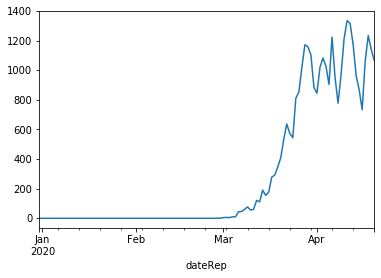

In [7]:
df_geo['cases']['NL'].plot()

What would China look like?

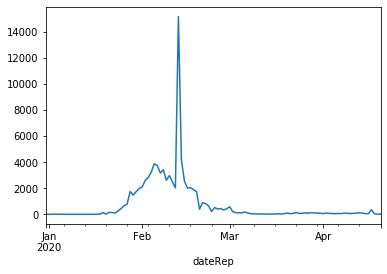

In [8]:
df_geo['cases']['CN'].plot()

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases. When was that?

In [9]:
df_geo[df_geo['cases']['CN'] > 2500]['cases']['CN']

dateRep
2020-02-02     2590.0
2020-02-03     2812.0
2020-02-04     3237.0
2020-02-05     3872.0
2020-02-06     3727.0
2020-02-07     3160.0
2020-02-08     3418.0
2020-02-09     2607.0
2020-02-10     2974.0
2020-02-13    15141.0
2020-02-14     4156.0
2020-02-15     2538.0
Name: CN, dtype: float64

So what does the original record look like?

In [10]:
df[(df['geoId'] == 'CN') & (df['dateRep'] == '2020-02-13')]

,dateRep,day,month,year,cases,deaths,geoId,continentExp,countryterritoryCode,popData2018,countriesAndTerritories
2407,2020-02-13,13,2,2020,15141,254,CN,Asia,CHN,1.392730e+09,China


To see the growth in number of cases, we can use a cumulative sum with `cumsum`, in this case we show __CN__ and __NL__.

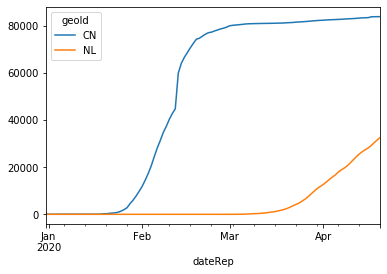

In [11]:
df_geo['cases'][['CN', 'NL']].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using the `log10` function from NumPy.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


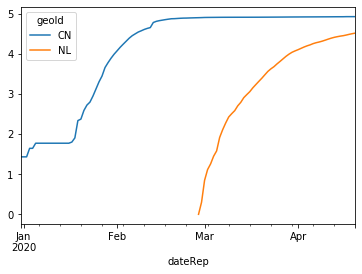

In [12]:
np.log10(df_geo['cases'][['CN', 'NL']].cumsum()).plot()

Alternatively, we ask `plot` to use a logarithmic scale.

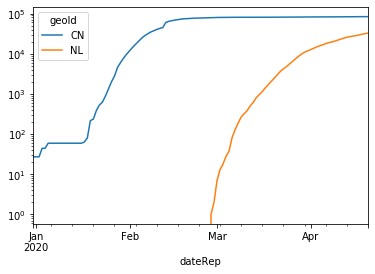

In [13]:
df_geo['cases'][['CN', 'NL']].cumsum().plot(logy=True)

This clearly shows the phases in __CN__, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For __NL__ we are still at the phase where measures start to take effect. Also, no real startup curve there.

Perhaps some other countries also show this effect.

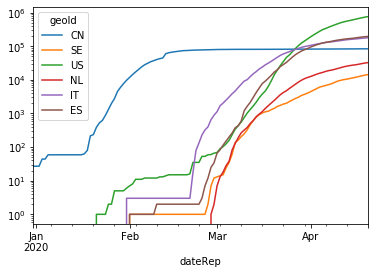

In [14]:
df_geo['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum().plot(logy=True)

Another interesting measure would be relative growth in number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the `loc` method.

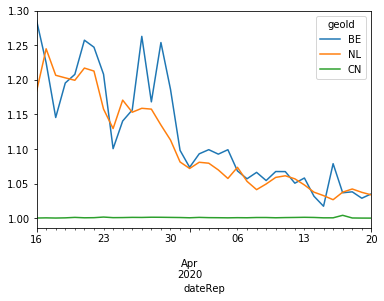

In [15]:
(df_geo.cumsum() / df_geo.shift().cumsum())['cases'][['BE', 'NL', 'CN']].loc['20200316':].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double by some logarithmic magic. For __NL__ the number doubled every one or two days in the beginning but now it doubles in over 10 days, which is a good sign.

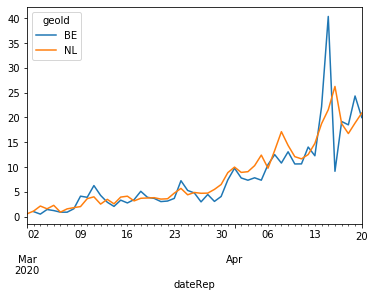

In [16]:
(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))['cases'][['BE', 'NL']].loc['20200301':].plot()

Rolling window functions can be used to smooth a curve, in this case the `rolling` 5 day `mean` new cases for __BE__ and __NL__.

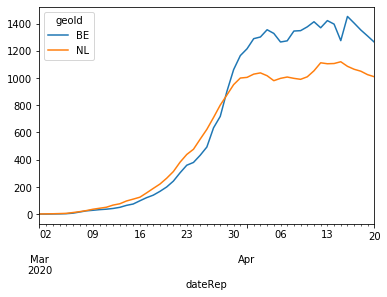

In [17]:
df_geo['cases'][['BE', 'NL']].rolling(7).mean().loc['20200301':].plot()

The default window function is a rectangle, where all values are weighed equally. Using another window function will weigh the values in the window differently, such as a gaussian function which will focus more on the recent values in the window, with a specified standard deviation as `std` in the `mean` aggregate function.

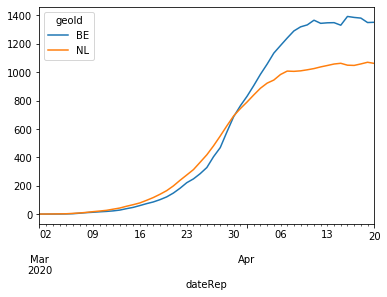

In [18]:
df_geo['cases'][['BE', 'NL']].rolling(14, win_type='gaussian').mean(std=7).loc['20200301':].plot()

Let's look at _the curve_ which we are supposed to flatten. It shows the number of active cases (the _infected_ category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently the last 14 days is used by EU CDC), so we only look at new cases from the last 14 days. By leaving out older infections (the _removed_ category in SIR) this shows us the current number of infections. China is clearly through their (first) curve. Italy and Spain seem to be over the top and so is France. We use a `sum` function to aggregate cases over the 14 day window.

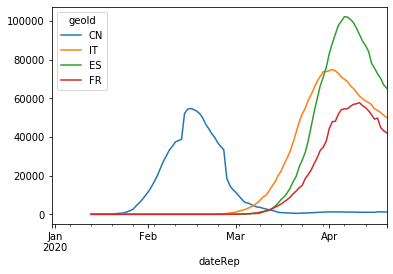

In [19]:
df_geo['cases'][['CN', 'IT', 'ES', 'FR']].rolling(14).sum().plot()

Assuming that we see about 10% of currently infected in Intensive Care, we can monitor the capacity with the following graph.

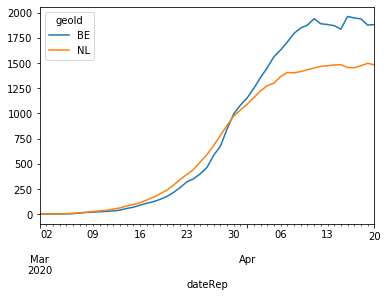

In [20]:
(df_geo['cases'][['BE', 'NL']].rolling(14).sum().loc['20200301':] * 0.1).plot()

For __NL__ this more or less corresponds with the official ICU data. We don't see the drop in number of current patients yet, that is probably offset by an increase in testing, so we may have to gradually lower the percentage.

In [21]:
(df_geo['cases'][['BE', 'NL']].rolling(14).sum().loc['20200301':] * 0.1).tail(14)

geoId,BE,NL
dateRep,,
2020-04-07,1707.1,1405.4
2020-04-08,1792.5,1402.0
2020-04-09,1846.6,1413.7
2020-04-10,1874.8,1433.1
2020-04-11,1938.3,1449.4
2020-04-12,1888.4,1465.1
2020-04-13,1881.1,1472.1
2020-04-14,1869.0,1480.1
2020-04-15,1834.4,1482.4


Now for some modeling. The _curve_ mentioned above can also be interpreted as a smoothed version of the new arriving cases, because using the sum over the last 14 days is just the mean times 14. It has the general shape of a gaussian curve, based on the underlying probability distribution of the disease spread. Gaussian curves have the nice property that the logarithm is a parabola.

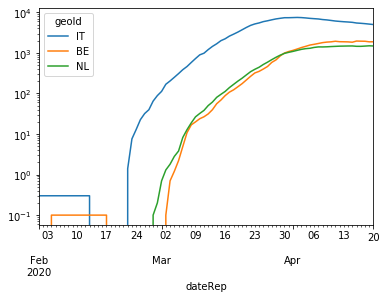

In [22]:
(df_geo['cases'][['IT', 'BE', 'NL']].rolling(14).sum().loc['20200201':] * 0.1).plot(logy=True)

The derivative of a parabola is a straight line. We can calculate that line by taking the gradient at each interval of the curve. Let's start with __NL__. We take a rolling week window to smooth the weekly reporting cycle.

In [23]:
#dg = pd.DataFrame(np.gradient(np.log10(df_geo['cases']['NL'].rolling(7).mean().loc['20200301':])))
#dg = pd.DataFrame(df_geo['cases']['NL'].rolling(7).mean().loc['20200301':])
#dg.plot()
#df_geo['cases']['NL'].loc['20200301':]
#df_geo['cases'].to_records['NL']
#df[df['geoId'] == 'NL'][['dateRep', 'cases']].values
dg = df[(df['geoId'] == 'NL') & (df['cases'] > 0)].sort_values(['dateRep'])
dg.describe()

,day,month,year,cases,deaths,popData2018
count,53.000000,53.000000,53.0,53.000000,53.000000,53.0
mean,14.396226,3.339623,2020.0,616.132075,69.509434,17231017.0
std,8.689825,0.552734,0.0,466.953796,67.676443,0.0
min,1.000000,2.000000,2020.0,1.000000,0.000000,17231017.0
25%,7.000000,3.000000,2020.0,111.000000,1.000000,17231017.0
50%,14.000000,3.000000,2020.0,734.000000,63.000000,17231017.0
75%,20.000000,4.000000,2020.0,1026.000000,132.000000,17231017.0
max,31.000000,4.000000,2020.0,1335.000000,234.000000,17231017.0


Now we can use simple linear regression to estimate the line. Once we have that, we integrate to the corresponding parabola, take the exponential and we have the estimated curve for that time series.

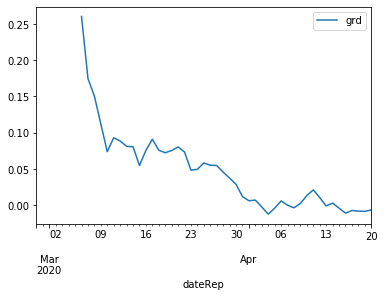

In [31]:
dg['day'] = (dg['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
dg['grd'] = np.gradient(np.log10(dg['cases'].rolling(7).mean()))
#df[df['geoId'] == 'NL'][['day', 'grd']].plot()
dg.plot(x='dateRep', y='grd')

In [25]:
from scipy import stats
dg[['day', 'grd']].dropna()

,day,grd
7816,430,0.260293
7815,431,0.174597
7814,432,0.150515
7813,433,0.111882
7812,434,0.073801
7811,435,0.093005
7810,436,0.088454
7809,437,0.081247
7808,438,0.080571
7807,439,0.054786


In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dg[['day', 'grd']].dropna())
print(slope, intercept, r_value, p_value, std_err)

-0.003558393878417555 1.6558660406032117 -0.8627633021262738 1.2778575201371235e-14 0.0003143764335447656


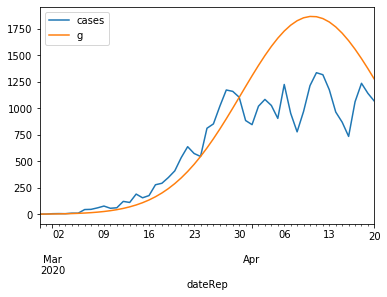

In [32]:
dg['y'] = slope * dg['day'] + intercept
dg['p'] = (slope / 2) * (dg['day'] ** 2) + (intercept * dg['day']) - 382
dg['g'] = 10 ** (dg['p'])
#df[df['geoId'] == 'NL']['g'].plot()
dg.plot(x='dateRep', y=['cases', 'g'])
#IT 291.6
#NL 382

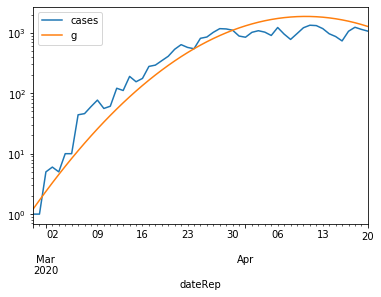

In [33]:
#dg.plot(x='dateRep', y=['p'])
dg.plot(x='dateRep', y=['cases', 'g'], logy=True)

In [29]:
dg.describe()

,day,month,year,cases,deaths,popData2018,grd,y,p,g
count,53.000000,53.000000,53.0,53.000000,53.000000,53.0,46.000000,53.000000,53.000000,53.000000
mean,449.000000,3.339623,2020.0,616.132075,69.509434,17231017.0,0.045693,0.058147,2.379638,800.850007
std,15.443445,0.552734,0.0,466.953796,67.676443,0.0,0.055360,0.054954,0.973434,729.151120
min,423.000000,2.000000,2020.0,1.000000,0.000000,17231017.0,-0.012327,-0.034371,0.081406,1.206163
25%,436.000000,3.000000,2020.0,111.000000,1.000000,17231017.0,0.000618,0.011888,1.739372,54.874724
50%,449.000000,3.000000,2020.0,734.000000,63.000000,17231017.0,0.041452,0.058147,2.795970,625.129638
75%,462.000000,4.000000,2020.0,1026.000000,132.000000,17231017.0,0.075522,0.104406,3.192160,1556.539908
max,475.000000,4.000000,2020.0,1335.000000,234.000000,17231017.0,0.260293,0.150665,3.270851,1865.738185


Keep exploring! Stay home, wash your hands, keep your distance.